## __EXPLORATORY DATA ANALYSIS__

__Librerias usadas__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from datetime import datetime
import math



Comenzamos con nuestro EDA

In [2]:
import pandas as pd
data = '../data/raw/crimedataorig.csv'
dataframe = pd.read_csv(data)
print(dataframe.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

In [3]:
dataframe.shape

(888472, 28)

Lo primero que haremos es definir cada variable:

- DR_NO: Número de informe del Departamento de Policía.
- Date Rptd: Fecha en que se presentó el informe.
- DATE OCC: Fecha en que ocurrió el incidente.
- TIME OCC: Hora del día en que ocurrió el incidente.
- AREA: Número de área en la que ocurrió el incidente.
- AREA NAME: Nombre del área.
- Rpt Dist No: Subarea de un area geográfica
- Part 1-2: Tipo de incidente. 1 Para indicentes graves y 2 para incidentes menos graves
- Crm Cd: Código del delito.
- Crm Cd Desc: Descripción del delito.
- Mocodes: Estos códigos proporcionan información sobre la forma en que se llevó a cabo un crimen
- Vict Age: Edad de la víctima.
- Vict Sex: Sexo de la víctima.
- Vict Descent: Descendencia de la víctima.
   Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - 
   Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
- Premis Cd: Código del tipo de lugar del incidente.
- Premis Desc: Descripción del lugar del incidente.
- Weapon Used Cd: Código del arma utilizada.
- Weapon Desc: Descripción del arma utilizada.
- Status: Estado del informe.
- Status Desc: Descripción del estado del informe.
- Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4: Códigos adicionales de delitos.
- LOCATION: Dirección del incidente.
- Cross Street: Calle cruzada.
- LAT, LON: Latitud y longitud del incidente

Como vimos en el apartado anterior la descripcion estadistica la vemos de nuevo pero describiendo la infomacion que nos da cada variable, 

In [4]:
dataframe.describe(include='all')


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
count,8.884720e+05,888472,888472,888472.000000,888472.000000,888472,888472.000000,888472.000000,888472.000000,888472,...,888471,888472,888461.000000,60942.000000,1807.000000,55.000000,888472,137999,888472.000000,888472.000000
unique,NaN,4525,2191,NaN,NaN,21,NaN,NaN,NaN,140,...,6,6,NaN,NaN,NaN,NaN,65692,9745,NaN,NaN
top,NaN,02/03/2023 12:00:00 AM,01/01/2010 12:00:00 AM,NaN,NaN,Central,NaN,NaN,NaN,VEHICLE - STOLEN,...,IC,Invest Cont,NaN,NaN,NaN,NaN,800 N ALAMEDA ST,BROADWAY,NaN,NaN
freq,NaN,921,1975,NaN,NaN,58975,NaN,NaN,NaN,85949,...,720223,720223,NaN,NaN,NaN,NaN,1634,2403,NaN,NaN
mean,1.940185e+08,NaN,NaN,1340.620272,10.830956,NaN,1129.520094,1.424423,500.662327,NaN,...,NaN,NaN,500.446992,956.283548,980.957388,990.072727,NaN,NaN,34.035509,-118.213958
std,4.546155e+07,NaN,NaN,651.780846,6.116259,NaN,611.667538,0.494255,208.816153,NaN,...,NaN,NaN,208.640473,113.696188,62.186702,29.075161,NaN,NaN,1.184996,4.098553
min,8.170000e+02,NaN,NaN,1.000000,1.000000,NaN,101.000000,1.000000,110.000000,NaN,...,NaN,NaN,110.000000,210.000000,310.000000,821.000000,NaN,NaN,0.000000,-118.766800
25%,1.519222e+08,NaN,NaN,900.000000,6.000000,NaN,628.000000,1.000000,330.000000,NaN,...,NaN,NaN,330.000000,998.000000,998.000000,998.000000,NaN,NaN,34.014600,-118.432100
50%,2.202064e+08,NaN,NaN,1415.000000,11.000000,NaN,1153.000000,1.000000,442.000000,NaN,...,NaN,NaN,442.000000,998.000000,998.000000,998.000000,NaN,NaN,34.059800,-118.324100
75%,2.301216e+08,NaN,NaN,1900.000000,16.000000,NaN,1651.000000,2.000000,626.000000,NaN,...,NaN,NaN,626.000000,998.000000,998.000000,998.000000,NaN,NaN,34.168500,-118.274000


- DR_NO: Al ser la variable con el numero de informe no nos indica informacion relevante
- Date Rptd: Tenemos pocos valores unicos en comparacion al numero de filas, por lo que podemos entender que varias fechas se repiten
- DATE OCC: Nos sucede lo mismo que con la variable anterior, aunque tenemos menos valores incluso unicos, vaarios incidentes sucedieron el mismo dia
- TIME OCC: Nos indica que la mayoria de incidentes ocurrieron alrededor de la 13:40 en horario de 24h
- AREA: los valores van del 1 al 21, nos indica que tenemos 21 aereas 
- AREA NAME: podemos corroborar que hay 21 valores unicos, tenemos 21 distintas aereas
- Rpt Dist No: la mayoria de incidentes estan concentrados alredor del area subgeografica 1129
- Part 1-2: variable binaria con valor 1-2 , 1 para delitos graves y 2 para delitos menos graves o secundarios
- Crm Cd: la media es el numero de delito 500
- Crm Cd Desc: Descripción del delito. 
- Mocodes: actividades asociadas con el sospechoso en la comisión del delito
- Vict Age: la media de la edad son los 30 años , sin embargo observamos valores negativos, estos nos indica errores en nuestros datos 
- Vict Sex: no nos indica valor numerico debido a que es una variable strg
- Vict Descent: no nos indica valor numerico debido a que es una variable strg
- Premis Cd: Muestra una variedad de códigos para las premisas asociadas a los incidentes.
- Premis Desc: Descripción del lugar del incidente.
- Weapon Used Cd: observamos que faltan algunos valores
- Weapon Desc: faltan algunos valores
- Status: Estado que mas se repite es el IC, es decir que la investigacion ha sido completada
- Status Desc: Descripción del estado del informe.
- Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4: cuando mayor sea el numero adicioanal del codigo mas valores faltantes hay
- LOCATION: se repiten varias localizaciones
- Cross Street: la calle mas repetida es la calle Broadway
- LAT, LON: indican un rango correspondiente  a los Angeles


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888472 entries, 0 to 888471
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           888472 non-null  int64  
 1   Date Rptd       888472 non-null  object 
 2   DATE OCC        888472 non-null  object 
 3   TIME OCC        888472 non-null  int64  
 4   AREA            888472 non-null  int64  
 5   AREA NAME       888472 non-null  object 
 6   Rpt Dist No     888472 non-null  int64  
 7   Part 1-2        888472 non-null  int64  
 8   Crm Cd          888472 non-null  int64  
 9   Crm Cd Desc     888472 non-null  object 
 10  Mocodes         773758 non-null  object 
 11  Vict Age        888472 non-null  int64  
 12  Vict Sex        782242 non-null  object 
 13  Vict Descent    782233 non-null  object 
 14  Premis Cd       888458 non-null  float64
 15  Premis Desc     888047 non-null  object 
 16  Weapon Used Cd  302570 non-null  float64
 17  Weapon Des

Nuestro objetivo de estudio ha sido el analisis de los datos recogidos que reflejan incidentes delictivos en la ciudad de Los Ángeles que se remontan a 2020. Con la finalidad de crear un modelo de machine learning que pueda predecir la gravedad de los incidentes que ocurren en esta zona.

Predecir la gravedad de los incidentes en una región tiene diversas aplicaciones y beneficios en diferentes contextos, como la gestión de la seguridad pública, la toma de decisiones gubernamentales, la asignación de recursos y la planificación de políticas

Vamos a trabajar con un dataframe de 888472 filas y 28 columnas, definimos nuestra target en la columna Part 1-2, ya que nos indica si el indidente ha sido grave o menos grave
La mayoria de variables cuentan con los datos al completo, sin embargo, destacan las casillas Crm Cd con un mayor numero de valores nulos , lo cual se puede entender ya que la mayoria no tiene codigos adicionales y menos 4 codigos de mas.

El siguiente paso que haremos será eliminar las columnas con informacion irrelavante que nos ayudará a un manejo de datos mas sencillo.


In [6]:
dataframe.drop(["DR_NO", "Date Rptd","Premis Desc", "Weapon Desc","Status Desc",
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis = 1, inplace = True)
print("Hemos eliminado un total de 8 columnas")
dataframe.head()

Hemos eliminado un total de 8 columnas


,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LOCATION,Cross Street,LAT,LON
0,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,400.0,AO,624.0,1100 W 39TH PL,NaN,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,500.0,IC,624.0,700 S HILL ST,NaN,34.0459,-118.2545
2,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,NaN,AA,845.0,200 E 6TH ST,NaN,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,NaN,IC,745.0,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,NaN,IC,740.0,14400 TITUS ST,NaN,34.2198,-118.4468


Ahora contamos con un total de 11 caracteristicas numericas, y un total de 9 variables categóricas.

__Conversion de Columnas para facilitar el analisis__

In [7]:
import pandas as pd
from datetime import datetime

#  Convertimos la columna Time a horario 24h
def convertir_a_24_horas(tiempo):
    tiempo_str = str(tiempo).zfill(4)
    dt = datetime.strptime(tiempo_str, '%H%M')
    return dt.strftime('%H:%M')

dataframe['TIME OCC'] = dataframe['TIME OCC'].apply(convertir_a_24_horas)

# Convertimos la columna DATE OCC , como nos parece interesante analizar tambien el estudio como serie temporal vamos a dividirlo en columnas

dataframe['DATE OCC'] = pd.to_datetime(dataframe['DATE OCC'], errors='coerce')

# Extraer componentes temporales
dataframe['Year'] = dataframe['DATE OCC'].dt.year
dataframe['Month'] = dataframe['DATE OCC'].dt.month
dataframe['Day'] = dataframe['DATE OCC'].dt.day
dataframe['Day_of_Week'] = dataframe['DATE OCC'].dt.day_name()



/tmp/ipykernel_13557/388506074.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['DATE OCC'] = pd.to_datetime(dataframe['DATE OCC'], errors='coerce')


In [ ]:

# Crear una nueva columna llamada 'Grave' y asignar 1 si 'Part 1-2' es 1, y 0 si es 2
dataframe['Grave'] = dataframe['Part 1-2'].apply(lambda x: 1 if x == 1 else 0)
# Grave : 0 para incidentes menos graves , 1 para incidentes  graves
# Eliminar la columna original 'Part 1-2' 
dataframe.drop('Part 1-2', axis=1, inplace=True)
print ("Grave: 0 para incidentes no graves y 1 para incidentes graves")

In [9]:
dataframe.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Day_of_Week,Grave
0,2020-01-08,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,624.0,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,1,8,Wednesday,0
1,2020-01-01,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,624.0,700 S HILL ST,NaN,34.0459,-118.2545,2020,1,1,Wednesday,0
2,2020-02-13,12:00,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,...,845.0,200 E 6TH ST,NaN,34.0448,-118.2474,2020,2,13,Thursday,0
3,2020-01-01,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,...,745.0,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,1,1,Wednesday,0
4,2020-01-01,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,...,740.0,14400 TITUS ST,NaN,34.2198,-118.4468,2020,1,1,Wednesday,0


__VARIABLES NUMERICAS__

In [10]:
numericas = dataframe.select_dtypes(include='number')
numericas


,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON,Year,Month,Day,Grave
0,3,377,624,36,501.0,400.0,624.0,34.0141,-118.2978,2020,1,8,0
1,1,163,624,25,102.0,500.0,624.0,34.0459,-118.2545,2020,1,1,0
2,1,155,845,0,726.0,NaN,845.0,34.0448,-118.2474,2020,2,13,0
3,15,1543,745,76,502.0,NaN,745.0,34.1685,-118.4019,2020,1,1,0
4,19,1998,740,31,409.0,NaN,740.0,34.2198,-118.4468,2020,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888467,12,1239,230,29,222.0,500.0,230.0,33.9841,-118.2915,2023,4,12,1
888468,6,647,901,30,502.0,NaN,901.0,34.0980,-118.3180,2023,12,1,0
888469,1,154,352,24,735.0,NaN,352.0,34.0467,-118.2485,2023,7,1,1
888470,9,914,745,53,502.0,NaN,745.0,34.1951,-118.4487,2023,3,5,0


In [11]:
numericas.describe()


,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON,Year,Month,Day,Grave
count,888472.000000,888472.000000,888472.000000,888472.000000,888458.000000,302570.000000,888461.000000,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000
mean,10.830956,1129.520094,500.662327,30.091994,311.305354,365.830350,500.446992,34.035509,-118.213958,2019.241189,6.523642,15.310999,0.575577
std,6.116259,611.667538,208.816153,21.445355,215.853424,121.273392,208.640473,1.184996,4.098553,4.606440,3.439227,8.976559,0.494255
min,1.000000,101.000000,110.000000,-12.000000,101.000000,101.000000,110.000000,0.000000,-118.766800,2010.000000,1.000000,1.000000,0.000000
25%,6.000000,628.000000,330.000000,15.000000,102.000000,400.000000,330.000000,34.014600,-118.432100,2015.000000,4.000000,7.000000,0.000000
50%,11.000000,1153.000000,442.000000,31.000000,207.000000,400.000000,442.000000,34.059800,-118.324100,2022.000000,7.000000,15.000000,1.000000
75%,16.000000,1651.000000,626.000000,45.000000,501.000000,400.000000,626.000000,34.168500,-118.274000,2023.000000,10.000000,23.000000,1.000000
max,21.000000,2198.000000,956.000000,120.000000,976.000000,516.000000,956.000000,34.706000,0.000000,2023.000000,12.000000,31.000000,1.000000


In [12]:
print(numericas.nunique())


AREA                21
Rpt Dist No       1222
Crm Cd             140
Vict Age           112
Premis Cd          320
Weapon Used Cd      79
Crm Cd 1           143
LAT               5381
LON               5004
Year                 6
Month               12
Day                 31
Grave                2
dtype: int64


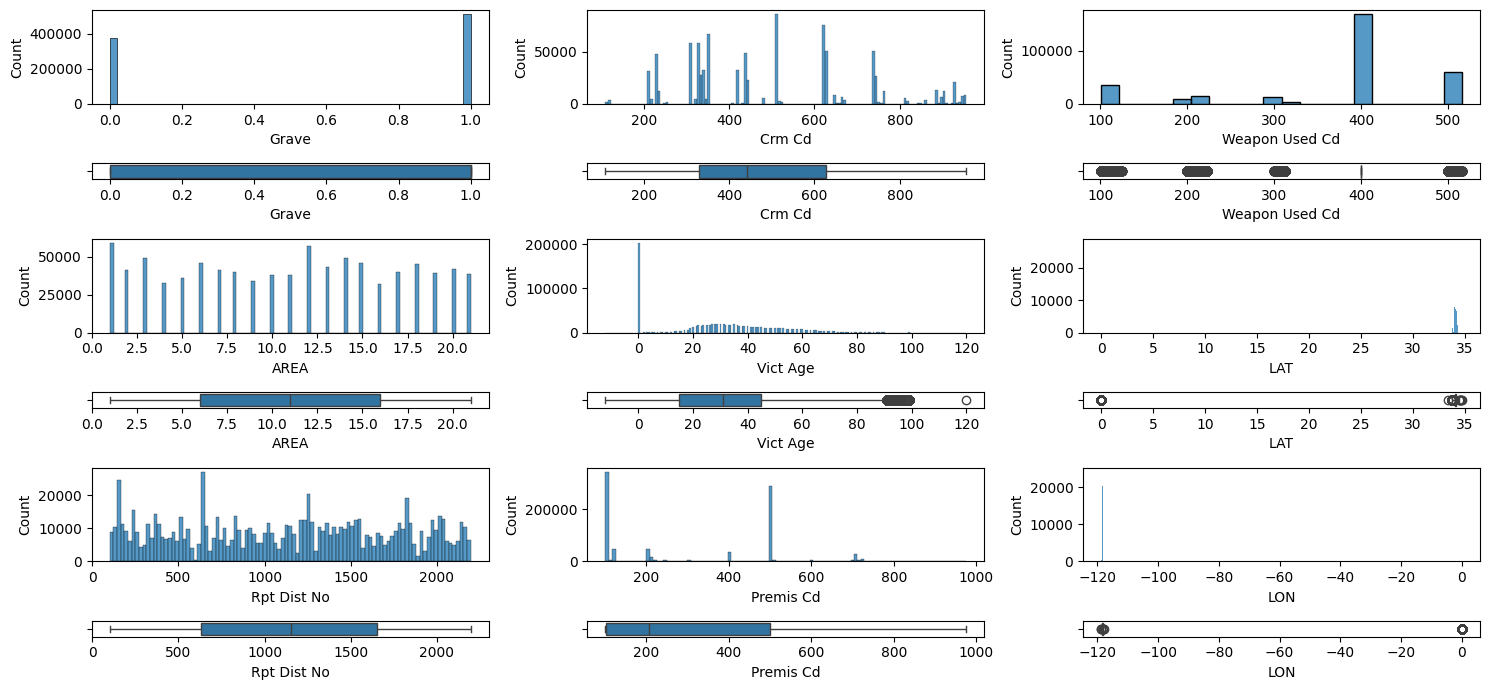

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 3, figsize=(15, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Crear subgráficos de histogramas y diagramas de caja
sns.histplot(ax=axes[0, 0], data=dataframe, x="Grave")
sns.boxplot(ax=axes[1, 0], data=dataframe, x="Grave")

sns.histplot(ax=axes[2, 0], data=dataframe, x="AREA")
sns.boxplot(ax=axes[3, 0], data=dataframe, x="AREA")

sns.histplot(ax=axes[4, 0], data=dataframe, x="Rpt Dist No")
sns.boxplot(ax=axes[5, 0], data=dataframe, x="Rpt Dist No")

sns.histplot(ax=axes[0, 1], data=dataframe, x="Crm Cd")
sns.boxplot(ax=axes[1, 1], data=dataframe, x="Crm Cd")

sns.histplot(ax=axes[2, 1], data=dataframe, x="Vict Age")
sns.boxplot(ax=axes[3, 1], data=dataframe, x="Vict Age")

sns.histplot(ax=axes[4, 1], data=dataframe, x="Premis Cd")
sns.boxplot(ax=axes[5, 1], data=dataframe, x="Premis Cd")

sns.histplot(ax=axes[0, 2], data=dataframe, x="Weapon Used Cd")
sns.boxplot(ax=axes[1, 2], data=dataframe, x="Weapon Used Cd")

sns.histplot(ax=axes[2, 2], data=dataframe, x="LAT")
sns.boxplot(ax=axes[3, 2], data=dataframe, x="LAT")

sns.histplot(ax=axes[4, 2], data=dataframe, x="LON")
sns.boxplot(ax=axes[5, 2], data=dataframe, x="LON")
# Ajustar el layout
plt.tight_layout()

# # # Mostrar el gráfico
# plt.show()
#imag1

- Grave: Los delitos graves superan a los menos graves
- Crm Cd: los codigos de delitos mas repetidos estan rondando el 500
- Weapon Used Cd: los codigos de armas mas utililizados son el 400 cuya descripcion es la siguiente : "FUERZA FÍSICA (MANOS, PUÑOS, PIES O 
  FUERZA CORPORAL), no contamos el 
  valor 0 ya que hace referencia a un valor nulo ; en este caso no podemos considerar los valores atipicos
- AREA: las areas mas repetidas son la 1 y la 12, que son Cental y 77th street respectivamente; tampoco observamos valores atipicos
- Vict Age: el valor mas repetido es 0 pero lo mas seguro a que sean valores nulos, la mayoria de victimas se encuentran entre os 20 y 40   
 años . Observamos que aqui si hay valores atipicos
- LAT y LON: las coordenadas se situan cerca esto es debido a que son de la misma ciudada de los Angeles, hay tambien valores atipicos
- Rpt Dist No :las areas subgraficas estan repartidas pero hay varias que sobresalen como el  162 y 645
- Premis Cd: el codigo de tipo de lugar mas repetido es el 101 seguido del 501, en la calle y en vivienda unifamiliar

In [14]:
categoricas = dataframe.select_dtypes(include='object')
categoricas

,TIME OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Status,LOCATION,Cross Street,Day_of_Week
0,22:30,Southwest,BATTERY - SIMPLE ASSAULT,0444 0913,F,B,AO,1100 W 39TH PL,NaN,Wednesday
1,03:30,Central,BATTERY - SIMPLE ASSAULT,0416 1822 1414,M,H,IC,700 S HILL ST,NaN,Wednesday
2,12:00,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,X,X,AA,200 E 6TH ST,NaN,Thursday
3,17:30,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,F,W,IC,5400 CORTEEN PL,NaN,Wednesday
4,04:15,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,X,IC,14400 TITUS ST,NaN,Wednesday
...,...,...,...,...,...,...,...,...,...,...
888467,16:30,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,M,B,IC,6100 S VERMONT AV,NaN,Wednesday
888468,10:00,Hollywood,VIOLATION OF RESTRAINING ORDER,1814 0913 2038 1501,F,H,IC,1500 N BRONSON AV,NaN,Friday
888469,00:01,Central,PICKPOCKET,1822 0344,F,H,IC,500 S MAIN ST,NaN,Saturday
888470,09:00,Van Nuys,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,F,H,IC,14500 HARTLAND ST,NaN,Sunday


In [15]:
print(categoricas.nunique())


TIME OCC          1439
AREA NAME           21
Crm Cd Desc        140
Mocodes         272008
Vict Sex             5
Vict Descent        20
Status               6
LOCATION         65692
Cross Street      9745
Day_of_Week          7
dtype: int64


Vamos a representar todas las variables excepto las que continen muchos valores unicos distintos ya que son visualmente dificiles de estudiar y no son muy relevantes, respecto a la hora hemos seleccionado las 30 mas repetidas ya que es una variable interesante de estudio, esta varible la consideremos importante

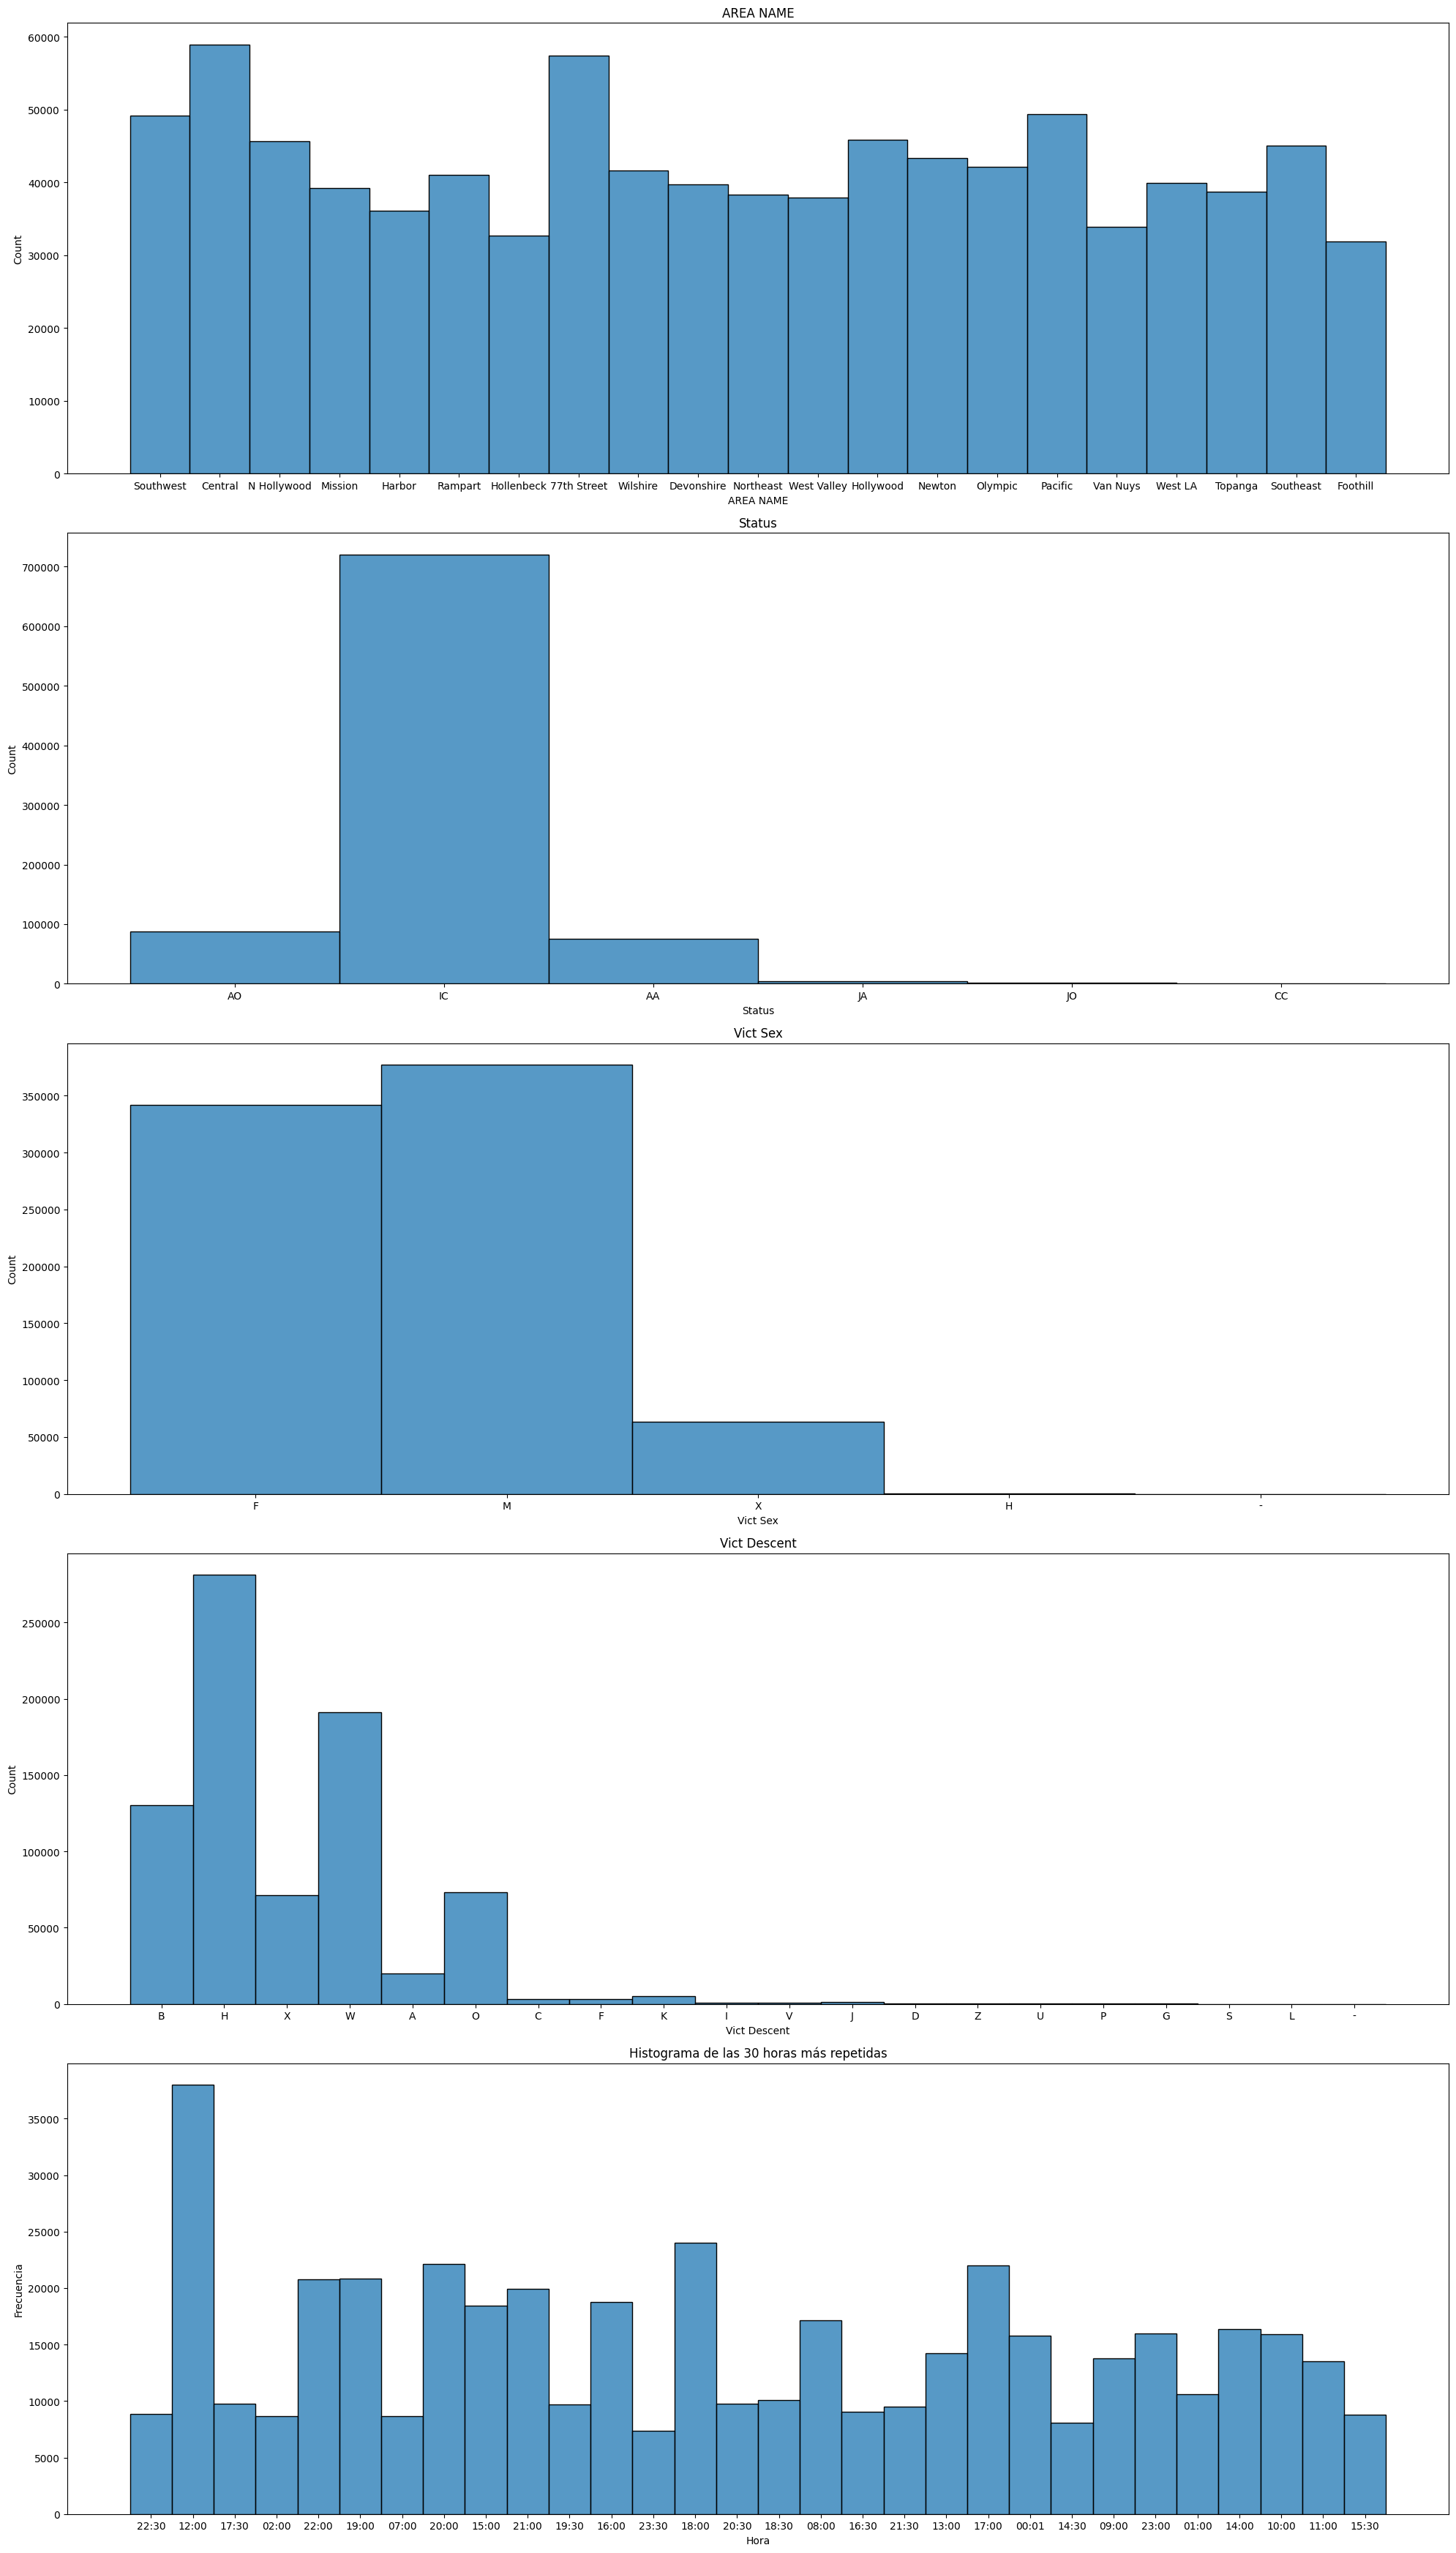

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las columnas para las cuales deseas crear histogramas
columnas = [ "AREA NAME", "Status", "Vict Sex", "Vict Descent"]

# Crear una figura y ejes con la cantidad correcta de filas y columnas
fig, ejes = plt.subplots(len(columnas) + 1, 1, figsize=(20, 7 * (len(columnas) + 1)))

# Iterar sobre las columnas y crear un histograma por columna
for i, columna in enumerate(columnas):
    sns.histplot(data=dataframe, x=columna, ax=ejes[i])
    ejes[i].set_title(columna)

# Obtener las 30 horas más repetidas
top_hours = dataframe["TIME OCC"].value_counts().head(30).index

# Filtrar el DataFrame solo para incluir las 30 horas más repetidas
dataframe_top_hours = dataframe[dataframe["TIME OCC"].isin(top_hours)]

# Crear un histograma para las 30 horas más repetidas
sns.histplot(data=dataframe_top_hours, x="TIME OCC", bins=30, kde=False, ax=ejes[-1])
ejes[-1].set_title("Histograma de las 30 horas más repetidas")
ejes[-1].set_xlabel("Hora")
ejes[-1].set_ylabel("Frecuencia")

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()
#imag 2


- Area Name: Las áreas donde ocurren un mayor numero de incidentes son Central y 77th Street
- Status: el estado que mas se repite es IC, es decir que la investigacion esta en curso
- VICT SEX: el numero de hombres que sufren delitos es mayor que el de las mujeres, hay generos que no se indican y valores nulos
- Vict Descent: segun el origen etnico la mayoria de victimas son Hispano hablantes/latinos y Blancos
- Time : La hora mas incidente es a las 12:00 pm , y las 18:00 pm

__VARIABLES TEMPORALES__

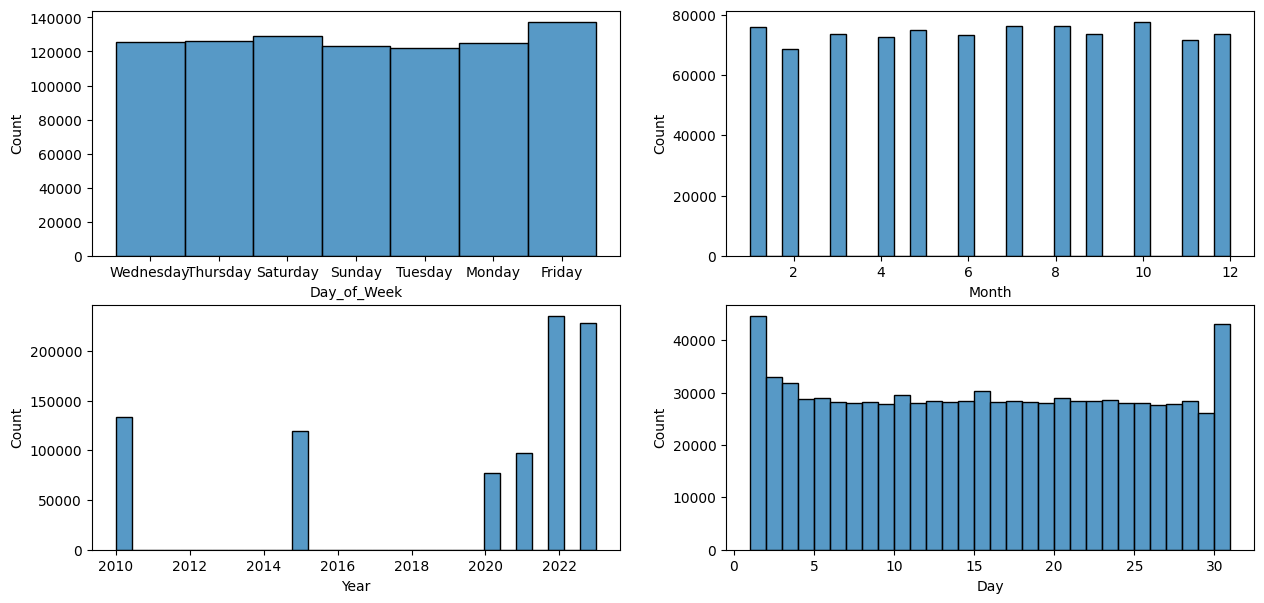

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una figura con subgráficos en una cuadrícula de 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 7), gridspec_kw={'height_ratios': [6, 6]})

# Supongamos que "dataframe" es tu DataFrame y "DATE OCC" es la columna datetime
sns.histplot(dataframe['Day_of_Week'], bins=30, kde=False, ax=axes[0, 0])
sns.histplot(dataframe['Year'], bins=30, kde=False, ax=axes[1, 0])
sns.histplot(dataframe['Month'], bins=30, kde=False, ax=axes[0, 1])
sns.histplot(dataframe['Day'], bins=30, kde=False, ax=axes[1, 1])


# Títulos y etiquetas

plt.show()
#imag3



Observando la distribucion de las fechas , si nos fijamos en el histograma de fechas casi todas las fechas se concentran del  2020 al  2024 como indicaba el estudio al que correpondia estas fehcas, sin embargo tambien podemos observar que hay datos recogidos para los años 2010 y 2016.
 - Casi todos los meses tienen la misma influencia aunque podemos destacae como el que mas octubre
 - Los dias de la semanas tambien tiene casi todos la misma distribucion pero detaca el Viernes
 - Respecto a los dias de los meses los dias que mas se repetien es el dia 1 y el 31.

__ANALISIS MULTIVARIBALE__

- ANALISIS NUMERICO CON VARIBLE DEPENDIENTE

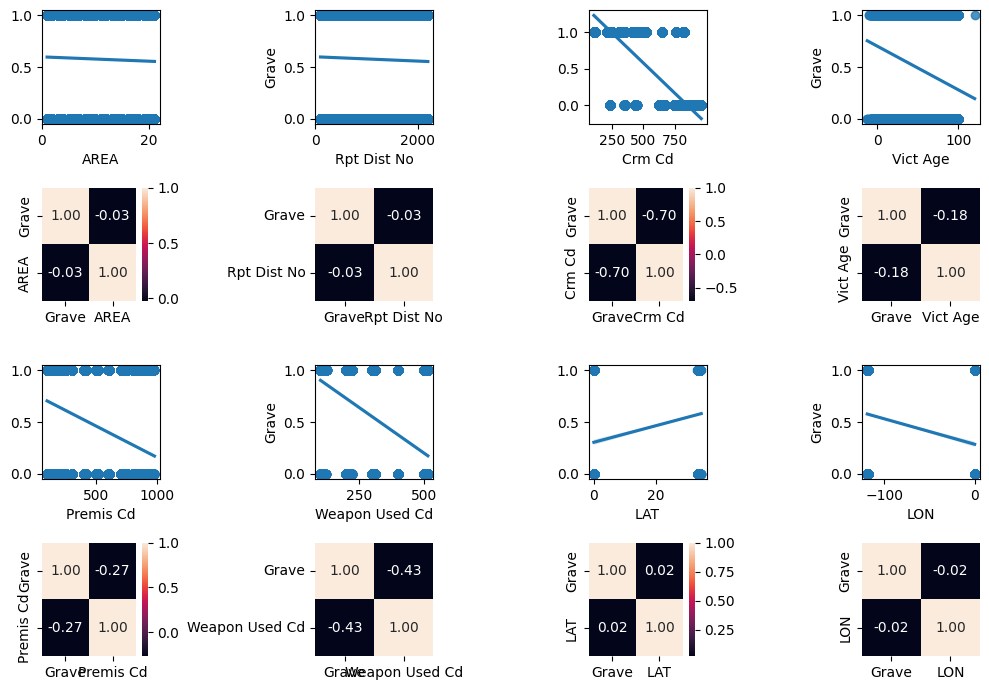

In [18]:
fig, axis = plt.subplots(4, 4, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple

sns.regplot(ax = axis[0, 0], data = dataframe, x = "AREA", y = "Grave").set(ylabel=None)
sns.heatmap(dataframe[["Grave", "AREA"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = dataframe, x = "Rpt Dist No", y = "Grave")
sns.heatmap(dataframe[["Grave", "Rpt Dist No"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = dataframe, x = "Crm Cd", y = "Grave").set(ylabel=None)
sns.heatmap(dataframe[["Grave", "Crm Cd"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[0, 3], data = dataframe, x = "Vict Age", y = "Grave")
sns.heatmap(dataframe[["Grave", "Vict Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)
sns.regplot(ax = axis[2, 0], data = dataframe, x = "Premis Cd", y = "Grave").set(ylabel=None)
sns.heatmap(dataframe[["Grave", "Premis Cd"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data = dataframe, x = "Weapon Used Cd", y = "Grave")
sns.heatmap(dataframe[["Grave", "Weapon Used Cd"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)
sns.regplot(ax = axis[2, 2], data = dataframe, x = "LAT", y = "Grave").set(ylabel=None)
sns.heatmap(dataframe[["Grave", "LAT"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])
sns.regplot(ax = axis[2, 3], data = dataframe, x = "LON", y = "Grave")
sns.heatmap(dataframe[["Grave", "LON"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3], cbar = False)
# Ajustar el layout
plt.tight_layout()

plt.show()
#imag4


Con los graficos obtenidos obtenemos las siguientes conclusiones:
 - AREA: la correlacion con el area es muy debil casi nula
 - Rpt Dist:correlacion debil la misma que con el área
 - Crm Cd: los codigos de delitos tienen una correlación de -0.70 sugiere una relación lineal negativa fuerte entre las dos variables. 
   Esto significa que hay una tendencia clara de cambio en una variable cuando la otra cambia, y la magnitud de la correlación indica la fuerza de esa relación. Es esperable ya que entre menor sea el delito mayor numeracion tendrá
 - Vict Age: obtenemos una correlacion  no muy sgnificativa y negativa entre mas edad menos tendencia que suceda un incidente grave
 - Premis Cd: correlacion notable pero no muy significativa, el tipo lugar del indidente tiene que ver con que el delito sea grave o 
  menos grave
 - Weapon Used Cd: los codigos de armas mas utililizados tambien tienen una correlacion negativa directa aunque un poco débil
 - LAT y LON: correlacion débil mismo numero pero una positiva y otra negativa



 - ANALISIS CATEGORICO CON VARIBLE DEPENDIENTE

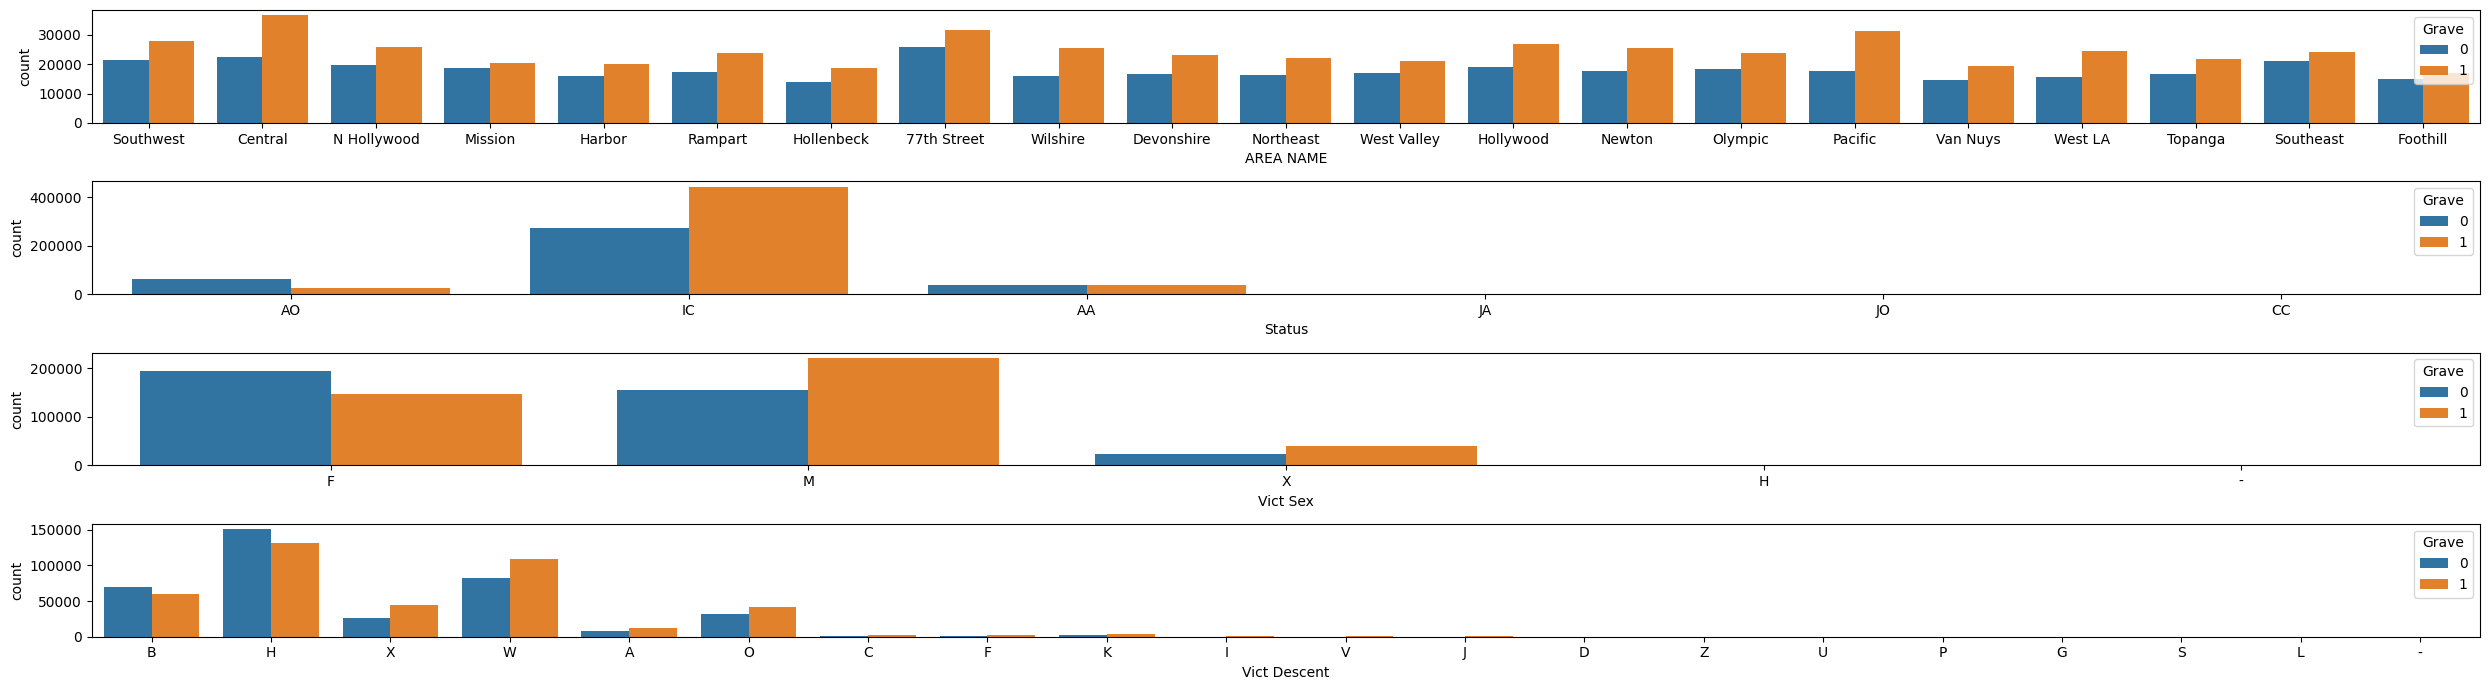

In [19]:
fig, axis = plt.subplots(4, figsize = (25, 7))

# Crear un diagrama de dispersión múltiple
sns.countplot(ax = axis[0], data = dataframe, x = "AREA NAME", hue = "Grave")
sns.countplot(ax = axis[1], data = dataframe, x = "Status", hue = "Grave")
sns.countplot(ax = axis[2], data = dataframe, x = "Vict Sex", hue = "Grave")
sns.countplot(ax = axis[3], data = dataframe, x = "Vict Descent", hue = "Grave")


plt.tight_layout()

plt.show()
#imag5

 - AREA: En todas las areas hay accidentes graves
 - Status: En las investigaciones en curso los accidentes graves son los que estan en mayoria 
 - Vict Sex: para las mujeres sucenden mas incidente menos graves que graves , al contrario que para los hombres
 - Vict Descent: para los origenes etnicos para los Hispano Latino , suceden mas incidentes que en el resto pero destancan los incidentes no graves

- ANALISIS VARIABLES CATEGÓRICAS CON TARGET

En este caso escogemos la representacion de la serie temporal por meses

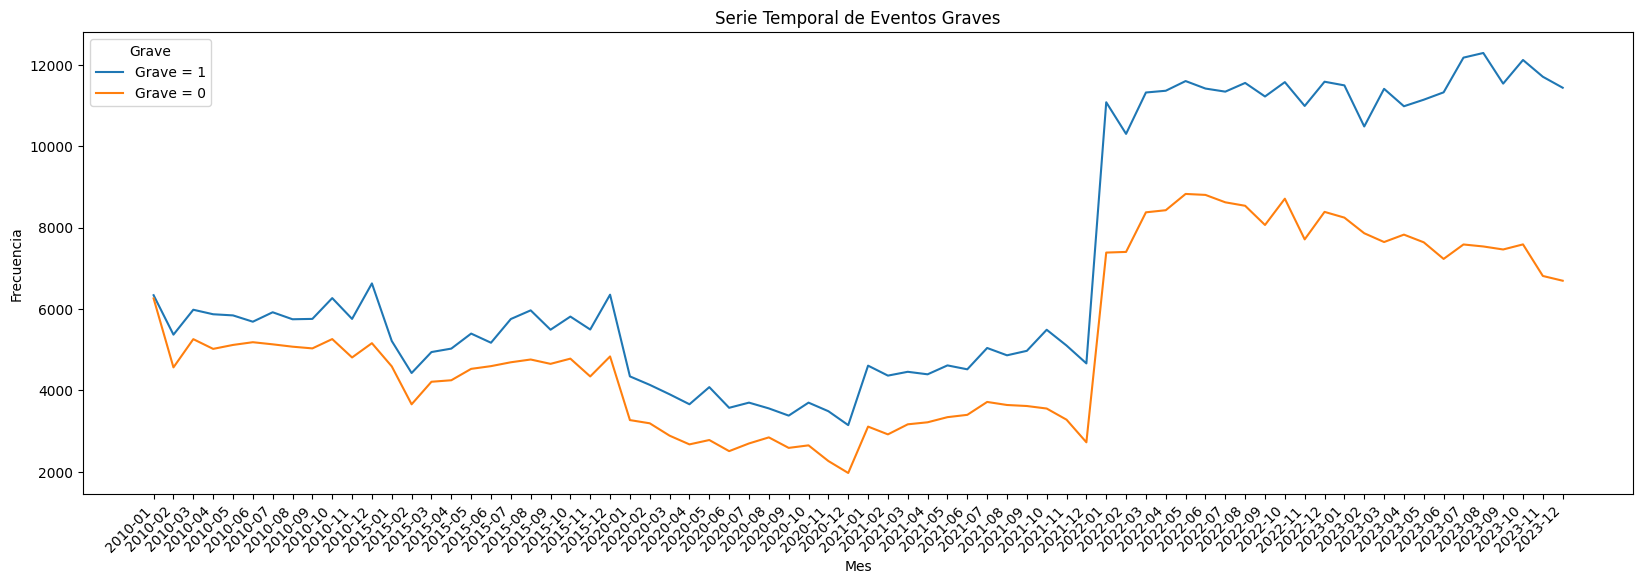

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que "dataframe" es tu DataFrame y "DATE OCC" es la columna datetime
dataframe['Month'] = dataframe['DATE OCC'].dt.to_period('M')

# Calcular la frecuencia de eventos graves por mes para Grave=1 y Grave=0
grave_counts_1 = dataframe[dataframe['Grave'] == 1].groupby('Month').size()
grave_counts_0 = dataframe[dataframe['Grave'] == 0].groupby('Month').size()

# Crear un gráfico de línea para mostrar la serie temporal
plt.figure(figsize=(20, 6))

# Graficar la serie temporal para Grave=1
sns.lineplot(x=grave_counts_1.index.astype(str), y=grave_counts_1.values, label='Grave = 1')

# Graficar la serie temporal para Grave=0
sns.lineplot(x=grave_counts_0.index.astype(str), y=grave_counts_0.values, label='Grave = 0')

plt.title('Serie Temporal de Eventos Graves')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.legend(title='Grave')
plt.show()
#imag6

Como observamos en el grafico de arriba para todos los periodo el numero de incidentes graves es mayor que los menos graves

 __ANALASIS DE CORRELACIONES COMPLETO__

Antes de hacer el analisis de correlaciones completo debemos factorizar las varibles categóricas

In [21]:
dataframe["Vict Sex"] = pd.factorize(dataframe["Vict Sex"])[0]
dataframe["Status"] = pd.factorize(dataframe["Status"])[0]
dataframe["Vict Descent"] = pd.factorize(dataframe["Vict Descent"])[0]
dataframe["Month"] = pd.factorize(dataframe["Month"])[0]
dataframe["Day_of_Week"] = pd.factorize(dataframe["Day_of_Week"])[0]
dataframe["AREA NAME"] = pd.factorize(dataframe["AREA NAME"])[0]

# EN EL ARCHIVO DOC.TXT TENEMOS LO REFERENTE A CADA VARIABLE


dataframe.head(5)

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Day_of_Week,Grave
0,2020-01-08,22:30,3,0,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,0,...,624.0,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,0,8,0,0
1,2020-01-01,03:30,1,1,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,1,...,624.0,700 S HILL ST,NaN,34.0459,-118.2545,2020,0,1,0,0
2,2020-02-13,12:00,1,1,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,2,...,845.0,200 E 6TH ST,NaN,34.0448,-118.2474,2020,1,13,1,0
3,2020-01-01,17:30,15,2,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,0,...,745.0,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,0,1,0,0
4,2020-01-01,04:15,19,3,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,2,...,740.0,14400 TITUS ST,NaN,34.2198,-118.4468,2020,0,1,0,0


In [22]:
dataframe['TIME OCC'] = pd.to_datetime(dataframe['TIME OCC'], format='%H:%M', errors='coerce').dt.hour + pd.to_datetime(dataframe['TIME OCC'], format='%H:%M', errors='coerce').dt.minute / 60
dataframe['TIME OCC'] = dataframe['TIME OCC'].round(2)

# Verificar el resultado
print(dataframe[['TIME OCC']])

        TIME OCC
0          22.50
1           3.50
2          12.00
3          17.50
4           4.25
...          ...
888467     16.50
888468     10.00
888469      0.02
888470      9.00
888471     23.00

[888472 rows x 1 columns]


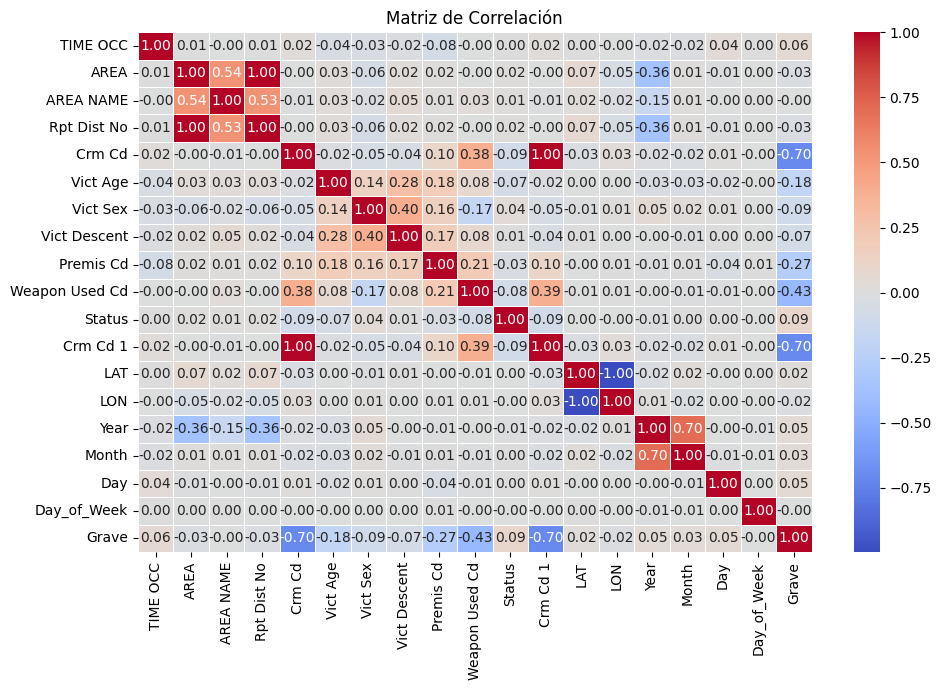

In [23]:
# Seleccionar solo columnas numéricas
numeric_columns = dataframe.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor
fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()
#imag7



Como estudiamos anteriormente , las correlaciones mas elevados son Crm Cd el codigo del delito y el arma usada y el tipo de lugar del incidente asi como la edad , en ese orden

__INGENIERIA DE LAS CARACTERISICTICAS__
 - ANALISIS DE OUTLIERS

In [24]:
dataframe.describe(include='all')


,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Day_of_Week,Grave
count,888472,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000,888472,773758,888472.000000,888472.000000,...,888461.000000,888472,137999,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000,888472.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,140,272008,NaN,NaN,...,NaN,65692,9745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,VEHICLE - STOLEN,0344,NaN,NaN,...,NaN,800 N ALAMEDA ST,BROADWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,85949,51735,NaN,NaN,...,NaN,1634,2403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019-09-27 19:41:46.537966336,13.520943,10.830956,9.643082,1129.520094,500.662327,NaN,NaN,30.091994,0.447370,...,500.446992,NaN,NaN,34.035509,-118.213958,2019.241189,42.624829,15.310999,3.028466,0.575577
min,2010-01-01 00:00:00,0.020000,1.000000,0.000000,101.000000,110.000000,NaN,NaN,-12.000000,-1.000000,...,110.000000,NaN,NaN,0.000000,-118.766800,2010.000000,0.000000,1.000000,0.000000,0.000000
25%,2015-10-06 00:00:00,9.000000,6.000000,4.000000,628.000000,330.000000,NaN,NaN,15.000000,0.000000,...,330.000000,NaN,NaN,34.014600,-118.432100,2015.000000,25.000000,7.000000,1.000000,0.000000
50%,2022-02-01 00:00:00,14.250000,11.000000,10.000000,1153.000000,442.000000,NaN,NaN,31.000000,0.000000,...,442.000000,NaN,NaN,34.059800,-118.324100,2022.000000,48.000000,15.000000,3.000000,1.000000
75%,2023-01-09 00:00:00,19.000000,16.000000,15.000000,1651.000000,626.000000,NaN,NaN,45.000000,1.000000,...,626.000000,NaN,NaN,34.168500,-118.274000,2023.000000,60.000000,23.000000,5.000000,1.000000
max,2023-12-31 00:00:00,23.980000,21.000000,20.000000,2198.000000,956.000000,NaN,NaN,120.000000,4.000000,...,956.000000,NaN,NaN,34.706000,0.000000,2023.000000,71.000000,31.000000,6.000000,1.000000


Observando la grafica anterior viendo comparando la media con el maximo no encontramos datos destacable, no obstante vamos a graficar diagramas de cajas para visulaizarlo mejor

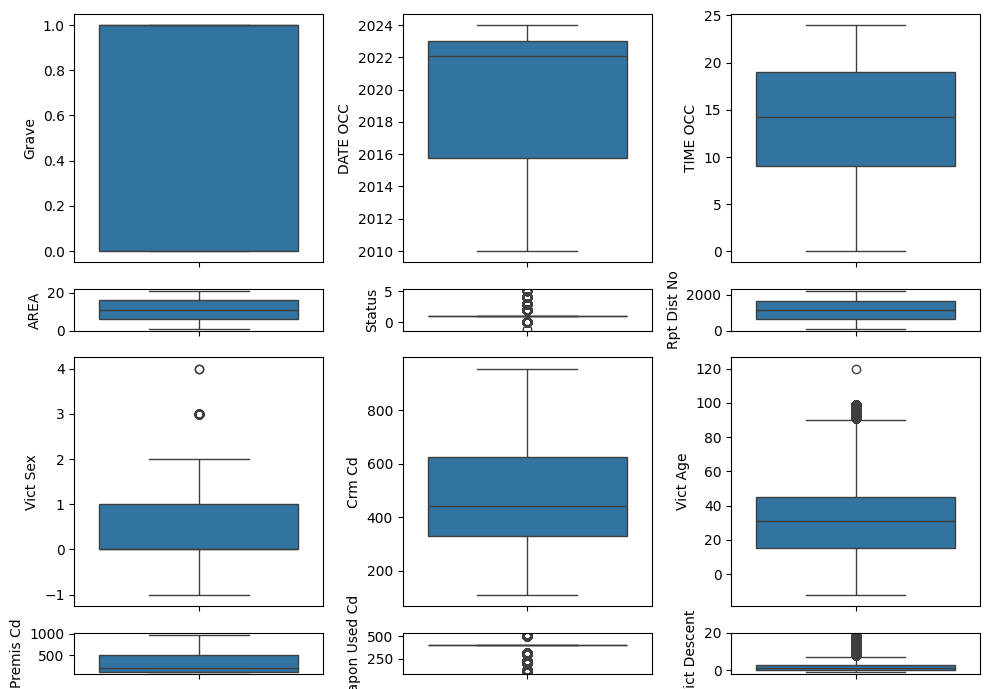

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear subgráficos de diagramas de caja
sns.boxplot(ax=axis[0, 0], data=dataframe, y="Grave")
sns.boxplot(ax=axis[0, 1], data=dataframe, y="DATE OCC")
sns.boxplot(ax=axis[0, 2], data=dataframe, y="TIME OCC")

sns.boxplot(ax=axis[1, 0], data=dataframe, y="AREA")
sns.boxplot(ax=axis[1, 1], data=dataframe, y="Status")
sns.boxplot(ax=axis[1, 2], data=dataframe, y="Rpt Dist No")

sns.boxplot(ax=axis[2, 0], data=dataframe, y="Vict Sex")
sns.boxplot(ax=axis[2, 1], data=dataframe, y="Crm Cd")
sns.boxplot(ax=axis[2, 2], data=dataframe, y="Vict Age")

sns.boxplot(ax=axis[3, 0], data=dataframe, y="Premis Cd")
sns.boxplot(ax=axis[3, 1], data=dataframe, y="Weapon Used Cd")
sns.boxplot(ax=axis[3, 2], data=dataframe, y="Vict Descent")



plt.tight_layout()
plt.show()
#imag8


Ahora podemos ver mejor las variables que contienen outliers. Analizaremos las varibales con outliers individualmente para decidir mantenerlos o quitarlos

__STATUS__

In [26]:
dataframe[dataframe["Status"]>4]

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Day_of_Week,Grave
119612,2010-11-14,17.00,17,9,1756,900,VIOLATION OF COURT ORDER,1501,45,0,...,900.0,17800 LASSEN ST,NaN,34.2504,-118.5216,2010,13,14,3,0
159673,2010-03-08,11.92,17,9,1764,653,"CREDIT CARDS, FRAUD USE ($950.01 & OVER)",0377 0930 1402 1822,30,1,...,653.0,19300 NORDHOFF ST,NaN,34.2355,-118.5536,2010,21,8,5,0
296042,2015-10-28,12.00,12,7,1267,210,ROBBERY,1309 1202 1822 0344 0346,64,1,...,210.0,MANCHESTER AV,FIGUEROA,33.9601,-118.2827,2015,38,28,0,1
303878,2015-08-14,15.00,13,13,1367,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1602,0,1,...,740.0,5100 HOLMES AV,NaN,33.9962,-118.2411,2015,28,14,6,0
389022,2015-06-26,21.50,12,7,1243,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1309 0342 0334 0411,56,1,...,230.0,67TH ST,WESTERN AV,33.9785,-118.3090,2015,31,26,6,1
503683,2022-11-16,16.25,1,1,135,814,CHILD PORNOGRAPHY,1901 1258 0913 1815 1251,10,0,...,814.0,300 S MAIN ST,NaN,34.0495,-118.2459,2022,56,16,0,0
622526,2022-12-10,15.25,1,1,119,350,"THEFT, PERSON",0910 1822 0344 0400,55,1,...,350.0,800 N ALAMEDA ST,NaN,34.0561,-118.2375,2022,52,10,2,1
739199,2023-06-02,13.67,13,13,1341,440,THEFT PLAIN - PETTY ($950 & UNDER),1259 1251 0344,16,1,...,440.0,36TH ST,MAIN ST,34.0170,-118.2742,2023,60,2,6,1
861517,2023-10-11,18.00,9,16,946,664,"BUNCO, PETTY THEFT",0800 0344 1822,72,0,...,664.0,13800 OXNARD ST,NaN,34.1794,-118.4334,2023,67,11,0,0


observando que el resto de columnas si aporta informacion relevante decidimos mantener estos outliers

__VICT SEX__


In [27]:
dataframe[dataframe["Vict Sex"]>3]

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Day_of_Week,Grave
147604,2010-09-06,16.50,15,2,1557,649,DOCUMENT FORGERY / STOLEN FELONY,0935 1822,47,4,...,649.0,5000 DENNY AV,NaN,34.1613,-118.3648,2010,18,6,5,0
820171,2023-06-29,21.25,20,14,2091,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1822 2002 0601 1309,0,4,...,740.0,1900 S WESTERN AV,NaN,34.0385,-118.3135,2023,60,29,1,0


en este caso como son filas que corresponden a indicentes menos graves y son pocos lo eliminamos

In [28]:
dataframe.drop(dataframe[dataframe["Vict Sex"] > 3].index, inplace=True)


# ANALISIS DE VALORES FALTANTES

In [29]:
dataframe.isnull().sum().sort_values(ascending=False)


Cross Street      750471
Weapon Used Cd    585900
Mocodes           114714
Premis Cd             14
Crm Cd 1              11
Status                 0
Day_of_Week            0
Day                    0
Month                  0
Year                   0
LON                    0
LAT                    0
LOCATION               0
DATE OCC               0
TIME OCC               0
Vict Descent           0
Vict Sex               0
Vict Age               0
Crm Cd Desc            0
Crm Cd                 0
Rpt Dist No            0
AREA NAME              0
AREA                   0
Grave                  0
dtype: int64

como son variables cartegoricas , vamos a rellenar los valores faltantes con el valor mas repetido 

In [30]:
dataframe["Cross Street"].fillna(dataframe["Cross Street"].mode()[0], inplace = True)
dataframe["Weapon Used Cd"].fillna(dataframe["Weapon Used Cd"].mode()[0], inplace = True)
dataframe["Premis Cd"].fillna(dataframe["Premis Cd"].mode()[0], inplace = True)
dataframe["Mocodes"].fillna(dataframe["Mocodes"].mode()[0], inplace = True)
dataframe["Crm Cd 1"].fillna(dataframe["Crm Cd 1"].mode()[0], inplace = True)


dataframe.isnull().sum()

/tmp/ipykernel_13557/1431935047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["Cross Street"].fillna(dataframe["Cross Street"].mode()[0], inplace = True)
/tmp/ipykernel_13557/1431935047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

/tmp/ipykernel_13557/1431935047.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["Mocodes"].fillna(dataframe["Mocodes"].mode()[0], inplace = True)
/tmp/ipykernel_13557/1431935047.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Weapon Used Cd    0
Status            0
Crm Cd 1          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
Year              0
Month             0
Day               0
Day_of_Week       0
Grave             0
dtype: int64

__DIVISION DEL CONJUNTO DE DATOS__

In [31]:
numeric_columns = dataframe.select_dtypes(include='number')
numeric_columns

,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LAT,LON,Year,Month,Day,Day_of_Week,Grave
0,22.50,3,0,377,624,36,0,0,501.0,400.0,0,624.0,34.0141,-118.2978,2020,0,8,0,0
1,3.50,1,1,163,624,25,1,1,102.0,500.0,1,624.0,34.0459,-118.2545,2020,0,1,0,0
2,12.00,1,1,155,845,0,2,2,726.0,400.0,2,845.0,34.0448,-118.2474,2020,1,13,1,0
3,17.50,15,2,1543,745,76,0,3,502.0,400.0,1,745.0,34.1685,-118.4019,2020,0,1,0,0
4,4.25,19,3,1998,740,31,2,2,409.0,400.0,1,740.0,34.2198,-118.4468,2020,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888467,16.50,12,7,1239,230,29,1,0,222.0,500.0,1,230.0,33.9841,-118.2915,2023,63,12,0,1
888468,10.00,6,12,647,901,30,0,1,502.0,400.0,1,901.0,34.0980,-118.3180,2023,69,1,6,0
888469,0.02,1,1,154,352,24,0,1,735.0,400.0,1,352.0,34.0467,-118.2485,2023,65,1,2,1
888470,9.00,9,16,914,745,53,0,1,502.0,400.0,1,745.0,34.1951,-118.4487,2023,71,5,3,0


In [32]:
dataframe['TIME OCC'] = dataframe['TIME OCC'].round(2).astype(float)


In [33]:
numeric_columns = dataframe.select_dtypes(include='number')
numeric_columns

,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,LAT,LON,Year,Month,Day,Day_of_Week,Grave
0,22.50,3,0,377,624,36,0,0,501.0,400.0,0,624.0,34.0141,-118.2978,2020,0,8,0,0
1,3.50,1,1,163,624,25,1,1,102.0,500.0,1,624.0,34.0459,-118.2545,2020,0,1,0,0
2,12.00,1,1,155,845,0,2,2,726.0,400.0,2,845.0,34.0448,-118.2474,2020,1,13,1,0
3,17.50,15,2,1543,745,76,0,3,502.0,400.0,1,745.0,34.1685,-118.4019,2020,0,1,0,0
4,4.25,19,3,1998,740,31,2,2,409.0,400.0,1,740.0,34.2198,-118.4468,2020,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888467,16.50,12,7,1239,230,29,1,0,222.0,500.0,1,230.0,33.9841,-118.2915,2023,63,12,0,1
888468,10.00,6,12,647,901,30,0,1,502.0,400.0,1,901.0,34.0980,-118.3180,2023,69,1,6,0
888469,0.02,1,1,154,352,24,0,1,735.0,400.0,1,352.0,34.0467,-118.2485,2023,65,1,2,1
888470,9.00,9,16,914,745,53,0,1,502.0,400.0,1,745.0,34.1951,-118.4487,2023,71,5,3,0


In [34]:
from sklearn.model_selection import train_test_split

num_variables = ["TIME OCC", "AREA", "Crm Cd", "Vict Age", "Vict Sex", "Vict Descent", "Premis Cd",
                  "Weapon Used Cd", "Status", "Month", "Day_of_Week"]

# Dividimos el conjunto de datos en muestras de entrenamiento y prueba
X = dataframe.drop("Grave", axis=1)[num_variables]
y = dataframe["Grave"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar datos de entrenamiento y prueba en archivos CSV
X_train.to_csv("../data/processed/X_train.csv", index=False)
y_train.to_csv("../data/processed/Y_train.csv", index=False)  # Corregir esta línea
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_test.to_csv("../data/processed/Y_test.csv", index=False)  # Corregir esta línea

X_train.head()



,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Month,Day_of_Week
414659,21.00,4,330,27,1,1,101.0,400.0,1,47,1
525993,6.82,20,930,23,1,0,402.0,511.0,1,54,1
332756,18.00,10,510,0,-1,-1,101.0,400.0,1,24,0
548042,2.00,3,310,21,2,2,210.0,400.0,1,54,4
380497,1.65,8,420,34,0,3,101.0,400.0,1,26,1


__SELECT K BEST__ 

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Supongamos que ya tienes tus conjuntos de entrenamiento X_train y y_train

# Crear el objeto SelectKBest con la función de puntuación f_classif (puedes ajustar esto según tu problema)
k_best_selector = SelectKBest(score_func=f_classif, k=9)

# Aplicar la transformación a tus datos de entrenamiento
X_train_k_best = k_best_selector.fit_transform(X_train, y_train)

# Obtener las columnas seleccionadas
selected_columns = X_train.columns[k_best_selector.get_support()]

# Crear un DataFrame con las características seleccionadas
X_train_selected = pd.DataFrame(X_train_k_best, columns=selected_columns)

# Repite el mismo proceso para los datos de prueba (X_test)
X_test_selected = pd.DataFrame(k_best_selector.transform(X_test), columns=selected_columns)



__NORMALIZAMOS NUESTROS DATOS__

In [36]:
from sklearn.preprocessing import StandardScaler

# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Normalizamos los datos de entrenamiento seleccionados
X_train_selected_scaled = scaler.fit_transform(X_train_selected)

# Aplicamos la misma transformación a los datos de prueba seleccionados
X_test_selected_scaled = scaler.transform(X_test_selected)

# Creamos DataFrames con los datos seleccionados y escalados
X_train_selected_scaled_df = pd.DataFrame(X_train_selected_scaled, columns=X_train_selected.columns)
X_test_selected_scaled_df = pd.DataFrame(X_test_selected_scaled, columns=X_train_selected.columns)

# Guardamos los DataFrames en archivos CSV
X_train_selected_scaled_df.to_csv('X_train_selected_scaled.csv', index=False)
X_test_selected_scaled_df.to_csv('X_test_selected_scaled.csv', index=False)


import pickle

# Guardamos el objeto scaler en un archivo .pkl
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)






In [38]:
X_test_selected_scaled_df

,TIME OCC,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Month
0,0.993070,0.044858,-1.403003,-1.825291,-1.390475,-0.973566,0.160203,0.001559,-0.768132
1,0.379589,-0.386145,-1.403003,-1.825291,-1.390475,-0.973566,0.160203,0.001559,1.001978
2,-0.655661,1.170257,0.928930,-0.564518,-0.864074,0.879746,0.160203,0.001559,0.510281
3,0.072848,1.146313,-0.983255,0.696255,0.715131,-0.973566,0.160203,2.148968,-1.259829
4,0.532959,-0.386145,-1.403003,-1.825291,-1.390475,-0.973566,0.160203,0.001559,1.296996
...,...,...,...,...,...,...,...,...,...
177689,0.226218,1.720985,-0.656784,0.696255,-0.337672,-0.500972,0.160203,0.001559,-2.095715
177690,0.532959,1.720985,0.182711,-0.564518,1.767935,-0.500972,0.160203,0.001559,0.903638
177691,1.542135,-1.296042,-0.656784,0.696255,-0.864074,0.879746,-3.886867,0.001559,0.362771
177692,0.686329,1.170257,-0.470230,-0.564518,-0.864074,-0.876268,0.160203,2.148968,-1.456508


Guardamos los dataframes para entrenar nuestro modelo

In [41]:
X_train_selected_scaled_df["Grave"] = list(y_train)
X_test_selected_scaled_df["Grave"] = list(y_test)
X_train_selected_scaled_df.to_csv("../data/processed/clean_train.csv", index = False)
X_test_selected_scaled_df.to_csv("../data/processed/clean_test.csv", index = False)